In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../datasets/SuperStoreUS.csv')
pd.set_option('display.max_columns', None)

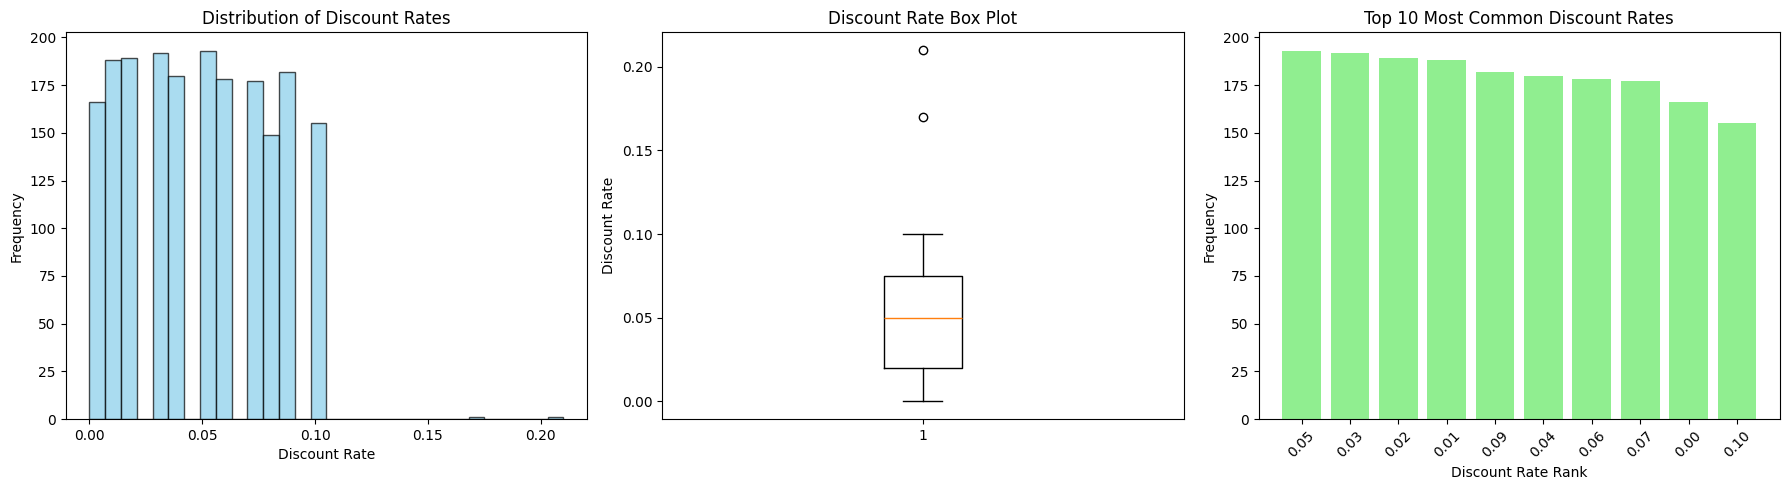

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['Discount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Discount Rates')
axes[0].set_xlabel('Discount Rate')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df['Discount'])
axes[1].set_title('Discount Rate Box Plot')
axes[1].set_ylabel('Discount Rate')

# Discount rate by frequency
discount_counts = df['Discount'].value_counts().head(10)
axes[2].bar(range(len(discount_counts)), discount_counts.values, color='lightgreen')
axes[2].set_title('Top 10 Most Common Discount Rates')
axes[2].set_xlabel('Discount Rate Rank')
axes[2].set_ylabel('Frequency')
axes[2].set_xticks(range(len(discount_counts)))
axes[2].set_xticklabels([f'{x:.2f}' for x in discount_counts.index], rotation=45)

plt.tight_layout()
plt.show()

In [10]:
df['Discount_Bin'] = pd.cut(df['Discount'], bins=10, include_lowest=True)
elasticity_data = df.groupby('Discount_Bin').agg({
    'Sales': 'mean',
    'Discount': 'mean'
}).dropna()

# # Calculate percentage changes
# elasticity_data['Sales_pct_change'] = elasticity_data['Sales'].pct_change()
# elasticity_data['Discount_pct_change'] = elasticity_data['Discount'].pct_change()

# # Calculate elasticity (% change in sales / % change in discount)
# elasticity_data['Elasticity'] = (elasticity_data['Sales_pct_change'] / 
#                                 elasticity_data['Discount_pct_change']).replace([np.inf, -np.inf], np.nan)

In [12]:
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Discount_Bin
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent� Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221,1/7/2015,1/8/2015,4.5600,4,13.01,88522,"(-0.0012100000000000001, 0.021]"
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy� Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776,6/13/2015,6/15/2015,4390.3665,12,6362.85,90193,"(-0.0012100000000000001, 0.021]"
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203,2/15/2015,2/17/2015,-53.8096,22,211.15,90192,"(0.042, 0.063]"
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS � Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372,5/12/2015,5/14/2015,803.4705,16,1164.45,86838,"(0.084, 0.105]"
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372,5/12/2015,5/13/2015,-24.0300,7,22.23,86838,"(0.063, 0.084]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,Small Box,Crate-A-Files�,0.59,United States,Central,Illinois,Danville,61832,3/11/2015,3/12/2015,-116.7600,18,207.31,87536,"(-0.0012100000000000001, 0.021]"
1947,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,Medium Box,Bell Sonecor JB700 Caller ID,0.60,United States,Central,Illinois,Danville,61832,3/11/2015,3/12/2015,-160.9520,22,143.12,87536,"(0.084, 0.105]"
1948,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Small Pack,Staples SlimLine Pencil Sharpener,0.60,United States,Central,Illinois,Des Plaines,60016,3/29/2015,3/31/2015,-41.8700,5,59.98,87534,"(0.063, 0.084]"
1949,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,Office Furnishings,Small Box,Eldon Expressions Punched Metal & Wood Desk Ac...,0.57,United States,East,West Virginia,Fairmont,26554,4/4/2015,4/4/2015,-24.7104,15,135.78,87537,"(0.084, 0.105]"
